<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">TP : oscillateurs
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Oscillateurs | Multivibrateur astable
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#  Oscillateur de relaxation : multivibrateur astable
On s'intéresse au circuit ci-dessous  :
<img src="fig1.png" style="width:150px">
L'étude théorique de cet oscillateur se mène en régime de saturation à travers l'étude des conditions de bascule, et celle de l'équation différentielle obtenue pour chaque régime de saturation (positive et négative).

En régime de saturation, il faut s'intérsser à la condition de bascule de $+U_\text{sat}$ à $-U_\text{sat}$ et vice-versa. On montre que l'ALI reste en saturation négative tant que $V^- > \frac{R_2}{R_1+R_2}U_\text{sat}$, et obéit alors à l'équation différentielle : 
$$
RC\dfrac{\text{d}V^-}{\text{d}t} + V^- =  + U_\text{sat}
$$

On peut alors déterminer l'intervalle de temps nécessaire à une bascule $+U_\text{sat}$ à $-U_\text{sat}$, et comme le fonctionnement est symétrique pour l'autre bascule, on détermine que la période des bascules est : 
$$\boxed{
T=2RC\ln\left(\dfrac{R_2+2R_1}{R_2}\right)
}$$

On peut alors mesurer la période obtenue pour diverses valeurs de résistances et tracer l'ensemble des points sur un graphe $T=f(R)$.

In [2]:
### Données propres aux divers blocs électrocinétiques
## Comparateur à hystérésis
R1 = 9.92e3 # résistance N°1 de l'amplificateur
R2 = 9.90e3 # résistance N°2 de l'amplificateur

# Filtre passe-bas
C = 93.3e-9 # condensateur

## Calcul de la pente théorique de la relation T=f(R)
a_theo = 2*C*np.log((R2+2*R1)/R2)

In [3]:
R_exp = np.array([1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 9e4, 10e4]) # valeurs utilisées pour la résistance variable
u_R_exp = np.array([i/100 for i in R_exp]) # estimation basée sur la valeur lue sur la décade de résistance

T_exp = np.array([2.132e-3, 4.24e-3, 6.36e-3, 8.50e-3, 10.62e-3, 12.76e-3, 14.94e-3, 17.12e-3, 19.28e-3, 21.48e-3]) # périodes mesurées expérimentalement
u_T_exp = np.array([4e-6, 8e-6, 10e-6, 2e-6, 1e-6, 2e-6, 4e-6, 4e-6, 4e-6, 4e-6]) # estimation basée sur les fluctutations de valeurs lues sur l'oscilloscope

In [4]:
# On utilise un simulation de MC pour calculer N pentes et ordonnées à l'origine en s'appuyant sur les valeurs expérimentales et leurs incertitudes
N=100000
a, b =[], [] # tableaux de stockage
for i in range(N):
    ai, bi = np.polyfit(R_exp + np.random.uniform(-1,1)*u_R_exp, T_exp+np.random.uniform(-1,1)*u_T_exp, 1) # calcul d'une pente et ordonnée à l'origine
    a.append(ai) # stockage des pentes
    b.append(bi) # stockage des ordonnées à l'origine

a_moy, b_moy=np.mean(a), np.mean(b) # pente et ordonnée à l'origine moyenne
u_a_moy, u_b_moy = np.std(a, ddof=1), np.std(b, ddof=1) # écart-type des pente et ordonnée à l'origine

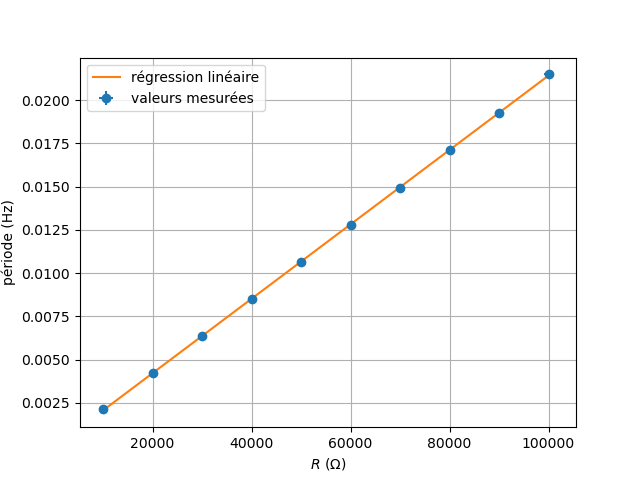

La pente théorique est : 2.05e-07 s/Ohm
La pente expérimentale est : 2.15e-07 +/- 1.24e-09 s/Ohm
L'écart relatif entre pente théorique et expérimentale : 4.5e+00 %
***
L'ordonnée à l'origine théorique est : 0 s
L'ordonnée à l'origine expérimentale est : -7.92e-05 +/- 3.47e-06 s


In [5]:
# Tracé des points expérimentaux et de la droite de régression moyenne
plt.figure()
plt.errorbar(R_exp, T_exp, xerr=u_R_exp, yerr=u_T_exp, fmt='o', label = 'valeurs mesurées')
plt.plot(R_exp, a_moy*R_exp+b_moy, label='régression linéaire')
plt.xlabel(r'$R~(\Omega)$')
plt.ylabel('période (Hz)')
plt.legend()
plt.grid(True)
plt.show()

print("La pente théorique est :", format(a_theo, "#.2e"), "s/Ohm")
print("La pente expérimentale est :", format(a_moy, "#.2e"),"+/-", format(u_a_moy, "#.2e"),"s/Ohm")
err_moy=np.mean(np.abs(a_theo-a_moy)/a_moy)
print("L'écart relatif entre pente théorique et expérimentale :", format(err_moy*100, "#.1e"), "%")
print("***")
print("L'ordonnée à l'origine théorique est : 0 s")
print("L'ordonnée à l'origine expérimentale est :", format(b_moy, "#.2e"),"+/-", format(u_b_moy, "#.2e"),"s")

# Mise en commun des valeurs de chaque groupe

In [6]:
# On relève la valeur de période obtenue par tous les groupes pour la résistance 10kOhm
T_10k=[2.22e-3, 2.1e-3, 2.3e-3, 2.22e-3, 2.21e-3, 2.22e-3, 2.23e-3, 2.132e-3, 2.25e-3, 2.25e-3, 2.19e-3] # valeurs mesurées par les divers groupes de TP
T_10k_moy = np.mean(T_10k) # valeur moyenne
u_T_10k=np.std(T_10k, ddof=1) # écart-type

print("La période moyenne obtenue par la classe est ", format(T_10k_moy, "#.2e"),"+/-", format(u_T_10k, "#.3e"), "s")

La période moyenne obtenue par la classe est  2.21e-03 +/- 5.529e-05 s
